In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import softmax
import collections

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
import xgboost as xgb

from FairReg import FairReg
from evaluation_measures import DP_unfairness, prob_unfairness
from plots import plot_distributions_compare, plot_predictions_compare, plot_distributions, plot_predictions

# Toy Example (K=4)

In [95]:
def gen_X(N, n_ftr=3):
    X = np.random.normal(0, 1, (N, n_ftr))
    return X

def gen_S(X):
    S = np.zeros(len(X))
    for i,x in enumerate(X[:,0]):
        if x <= -0.7:
            S[i] = 0
        elif x < 0:
            S[i] = 1
        elif x < 0.7:
            S[i] = 2
        else:
            S[i] = 3
    return S
    
def gen_y(X):
    N, n_ftr = X.shape
    return np.dot(X, np.ones(n_ftr) * 4) + X[:,0] + np.random.normal(0, 1, N) 

In [96]:
N = 2000

X = gen_X(N)
S = gen_S(X)
y = gen_y(X)

In [97]:
p = []
for s in range(4):
    p_s = len(S[S==s])/len(S)
    p.append(p_s)

In [98]:
p

[0.224, 0.268, 0.2635, 0.2445]

In [99]:
y = y/40

In [100]:
TRAIN_SIZE, UNLAB_SIZE, TEST_SIZE = 0.4, 0.4, 0.2

X_train, X_, S_train, S_, y_train, y_ = train_test_split(X, S, y, train_size = TRAIN_SIZE, stratify = S)
X_unlab, X_test, S_unlab, S_test, y_unlab, y_test = train_test_split(X_, S_, y_, test_size = TEST_SIZE/(1-TRAIN_SIZE), stratify = S_)

In [101]:
#base method
reg = LinearRegression(fit_intercept=True)
reg.fit(X_train, y_train)

LinearRegression()

In [102]:
#classifier
clf = LogisticRegression()
clf.fit(X_train,S_train)

LogisticRegression()

In [117]:
T=50000
beta='auto'
L='auto'

fair_reg = FairReg(reg, clf, B=0.63, K=4,  p=p, eps=[0.000001, 0.000001, 0.000001, 0.000001], T=T)
fair_reg.fit(X_unlab, beta, L)

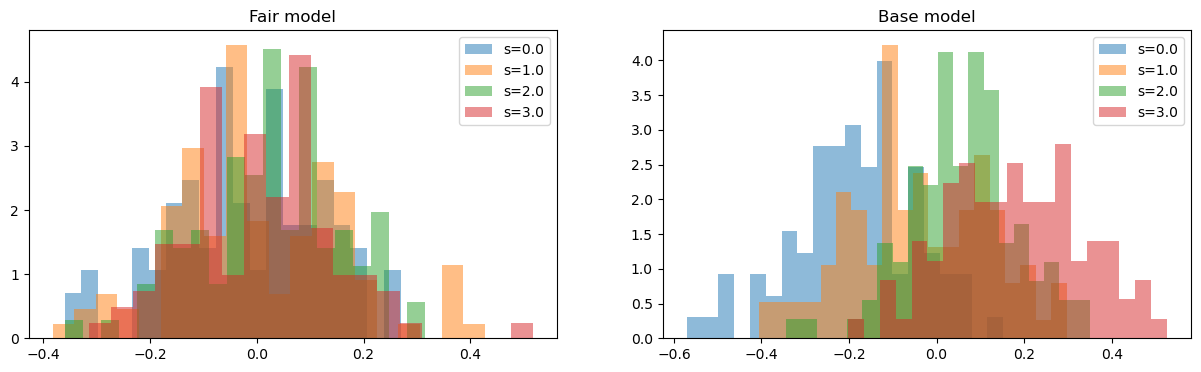

In [118]:
plot_distributions_compare(fair_reg, reg, X_test, pd.DataFrame({'S':S_test})['S'])